In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import Sequential


In [27]:
from math import tanh, sqrt
import matplotlib.pyplot as plt

In [17]:
# Functions:

def targetValueFunction(inpAttr):
#     inpAttr shape = (samples, numberOfAttributes)
    bias = np.random.random_sample(inpAttr.shape[1])
    bias = (0.6-0.2)*bias + 0.2
#     Setting range of random bias as 0.2 to 0.6
#     Will add the same bias to all samples
    print(bias)
    inpAttr = inpAttr*inpAttr
    for i in range(inpAttr.shape[0]):
        for j in range(inpAttr.shape[1]):
            inpAttr[i][j] = tanh(inpAttr[i][j])
    for i in range(inpAttr.shape[0]):
        inpAttr[i] += bias
    for i in range(inpAttr.shape[0]):
        for j in range(inpAttr.shape[1]):
            inpAttr[i][j] = sqrt(inpAttr[i][j])
#     returns values = sum(root(tanh(x^2) + bias))
    target = np.sum(inpAttr, axis = 1)
    print(target)
    return target

In [ ]:
# Sorted Scenes till here

In [5]:
trial = []
trial.append([1,2,3,4])
trial.append([3,1,3,5])
trial.append([1,-2,0.3,2.5])
trial = np.asarray(trial)
print(trial)
trial = trial/10
print(trial)

[[ 1.   2.   3.   4. ]
 [ 3.   1.   3.   5. ]
 [ 1.  -2.   0.3  2.5]]
[[ 0.1   0.2   0.3   0.4 ]
 [ 0.3   0.1   0.3   0.5 ]
 [ 0.1  -0.2   0.03  0.25]]


In [7]:
print(trial.shape)

(3, 4)


In [18]:
t = targetValueFunction(trial)

[0.46395776 0.51511021 0.44662893 0.29777855]
[2.84146665 2.93782943 2.70262896]


In [ ]:
# Some adjustable parameters (hyper parameters in our case)

In [23]:
numSamples = 5000
numAttributes = 10
inpX = np.random.random_sample((numSamples,numAttributes))

In [24]:
targets = targetValueFunction(inpX)

[0.57697825 0.28405326 0.38593481 0.30144476 0.32608157 0.54723307
 0.31920214 0.59998487 0.44014847 0.26628209]
[8.65423459 7.67227654 8.07788924 ... 8.44071966 7.9705275  7.99895843]


In [25]:
targets.shape

(5000,)

In [ ]:
# Sorted Scenes Till Here

In [21]:
# Neural Network which must not be named..... jk, who's working has to be optimised

experimentalModel = Sequential()
experimentalModel.add(Dense(2*numAttributes, input_shape = (numAttributes,)))
experimentalModel.add(Dense(numAttributes))
experimentalModel.add(Dense(1))
experimentalModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                220       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


In [22]:
experimentalModel.get_weights()

[array([[-0.43322143,  0.12346327,  0.09343392,  0.36352813,  0.00592521,
          0.33863235,  0.11680675, -0.05864641,  0.16548228,  0.29723966,
         -0.16292942,  0.09738827,  0.22309577, -0.09892055,  0.24356127,
         -0.008127  ,  0.2857684 , -0.33342946, -0.34164268,  0.40150887],
        [ 0.05613649, -0.00562069, -0.20703018,  0.2499826 ,  0.38983577,
         -0.05804944,  0.34739155,  0.01617476, -0.2679612 , -0.07443723,
         -0.05088311,  0.07401371, -0.02095568, -0.3145495 , -0.22126096,
         -0.00144815,  0.00510547, -0.2266187 , -0.17195043, -0.05285195],
        [ 0.10203707, -0.18933856,  0.26210338, -0.23906578, -0.25242034,
         -0.164354  , -0.08282116,  0.25688905, -0.22769007, -0.20444763,
          0.00134689, -0.14859998,  0.09727931, -0.14055958,  0.16935456,
         -0.17295983, -0.15726787, -0.31188607, -0.23318334, -0.3198818 ],
        [ 0.01569122, -0.41594598, -0.04671752, -0.03357995, -0.24990284,
          0.13691473, -0.12111765, 

In [26]:
experimentalModel.compile(optimizer = 'adam', loss= 'mse', metrics = ['accuracy'])

In [28]:
# Training
trackingArray = []
batch_size = 20
for i in range(0,numSamples,15):
    experimentalModel.fit(np.asarray(inpX[i:i+batch_size]),np.asarray(targets[i:i+batch_size]))
    trackingArray.append(np.array(experimentalModel.get_weights()))
print(len(trackingArray))

1/1 [==============================] - 0s 869us/step - loss: 0.9735


1/1 [==============================] - 0s 882us/step - loss: 0.8734


1/1 [==============================] - 0s 1ms/step - loss: 1.4801
334


In [29]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [30]:
trackingArray = np.asarray(trackingArray)
trackingArray.shape

(334, 6)

In [35]:
for i in range(6):
    print(np.asarray(trackingArray[0][i]).shape)

(10, 20)
(20,)
(20, 10)
(10,)
(10, 1)
(1,)


In [37]:
layer1 = []
layer2 = []
for i in range(10*20):
    layer1.append([])
    layer2.append([])
bias1 = []
bias2 = []
layer3 = []
for i in range(10):
    layer3.append([])
    bias1.append([])
    bias1.append([])
    bias2.append([])
bias3 = []
for i in range(trackingArray.shape[0]):
    for k in range(200):
        layer1[k].append(trackingArray[i][0][int(k//20)][int(k%20)])
        layer2[k].append(trackingArray[i][2][int(k//10)][int(k%10)])
    for k in range(10):
        layer3[k].append(trackingArray[i][4][k][0])
        bias2[k].append(trackingArray[i][3][k])
        bias1[2*k].append(trackingArray[i][1][2*k])
        bias1[2*k+1].append(trackingArray[i][1][2*k+1])
    bias3.append(trackingArray[i][5])



In [38]:
layer1 = np.asarray(layer1)
layer2 = np.asarray(layer2)
layer3 = np.asarray(layer3)
bias1 = np.asarray(bias1)
bias2 = np.asarray(bias2)
bias3 = np.asarray(bias3)

print(layer1.shape)
print(layer2.shape)
print(layer3.shape)
print(bias1.shape)
print(bias2.shape)
print(bias3.shape)


(200, 334)
(200, 334)
(10, 334)
(20, 334)
(10, 334)
(334, 1)


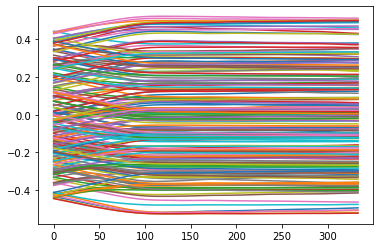

In [39]:
for i in range(200):
    plt.plot(layer1[i])

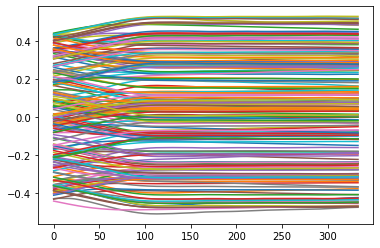

In [40]:
for i in range(200):
    plt.plot(layer2[i])

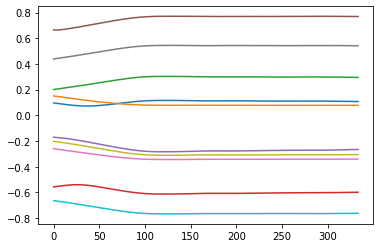

In [41]:
for i in range(10):
    plt.plot(layer3[i])

In [ ]:
for i in range(20):
    plt.plot(bias1[i])